# Introduction

In this lab, we will go through a step-by-step process of implementing Recursive Feature Elimination with Cross-Validation (RFECV) using scikit-learn. RFECV is used for feature selection, which is the process of selecting a subset of relevant features for use in model construction. We will use a classification task with 15 features, out of which 3 are informative, 2 are redundant, and 10 are non-informative.

In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=500,
    n_features=15,
    n_informative=3,
    n_redundant=2,
    n_repeated=0,
    n_classes=8,
    n_clusters_per_class=1,
    class_sep=0.8,
    random_state=0,
)

# Model training and selection

We will create the RFECV object and compute the cross-validated scores. The scoring strategy "accuracy" optimizes the proportion of correctly classified samples. We will use logistic regression as the estimator and stratified k-fold cross-validation with 5 folds.

In [3]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

min_features_to_select = 1 # Minimum number of features to consider
clf = LogisticRegression()
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring='accuracy',
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X, y)

print(f'Optimal number of features: {rfecv.n_features_}')

Optimal number of features: 3


# Plot number of features vs. cross-validation scores

We will plot the number of features selected against the cross-validation scores. We will use matplotlib to create the plot.

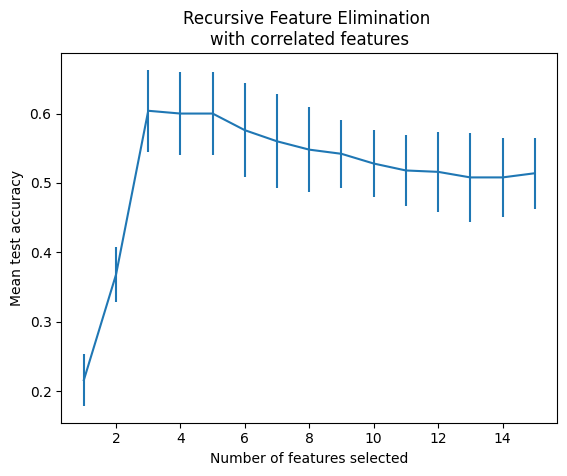

In [4]:
import matplotlib.pyplot as plt

n_scores = len(rfecv.cv_results_['mean_test_score'])
plt.figure()
plt.xlabel('Number of features selected')
plt.ylabel('Mean test accuracy')
plt.errorbar(
    range(min_features_to_select, n_scores+min_features_to_select),
    rfecv.cv_results_['mean_test_score'],
    yerr=rfecv.cv_results_['std_test_score'],
)
plt.title('Recursive Feature Elimination \nwith correlated features')
plt.show()

# Summary

In this lab, we went through the process of implementing Recursive Feature Elimination with Cross-Validation (RFECV) using scikit-learn. We generated a classification task with 15 features, out of which 3 were informative, 2 were redundant, and 10 were non-informative. We used logistic regression as the estimator and stratified k-fold cross-validation with 5 folds. We plotted the number of features selected against the cross-validation scores. We found that the optimal number of features was 3, which corresponded to the true generative model. We also noticed a plateau of equivalent scores for 3 to 5 selected features due to the introduction of correlated features.